In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = pd.read_csv('M5_T1_V4_Cholesterol.csv')
df

,Before,After4weeks,After8weeks,Margarine
0,6.76,6.20,6.13,A
1,4.80,4.27,4.15,A
2,7.49,7.12,7.05,A
3,5.05,4.63,4.67,A
4,3.91,3.70,3.66,A
5,6.17,5.56,5.51,A
6,7.67,7.11,6.96,A
7,7.34,6.84,6.82,A
8,5.13,4.52,4.45,A
9,6.42,5.83,5.75,B


<AxesSubplot:xlabel='Before', ylabel='Density'>

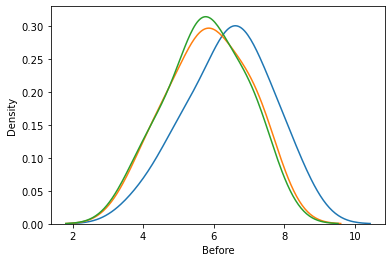

In [2]:
sns.kdeplot(df['Before'])
sns.kdeplot(df['After4weeks'])
sns.kdeplot(df['After8weeks'])

In [3]:
df['loss4'] = df['After4weeks'] - df['Before']
df['loss8'] = df['After8weeks'] - df['Before']
df

,Before,After4weeks,After8weeks,Margarine,loss4,loss8
0,6.76,6.20,6.13,A,-0.56,-0.63
1,4.80,4.27,4.15,A,-0.53,-0.65
2,7.49,7.12,7.05,A,-0.37,-0.44
3,5.05,4.63,4.67,A,-0.42,-0.38
4,3.91,3.70,3.66,A,-0.21,-0.25
5,6.17,5.56,5.51,A,-0.61,-0.66
6,7.67,7.11,6.96,A,-0.56,-0.71
7,7.34,6.84,6.82,A,-0.50,-0.52
8,5.13,4.52,4.45,A,-0.61,-0.68
9,6.42,5.83,5.75,B,-0.59,-0.67


C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Margarine', ylabel='loss4'>

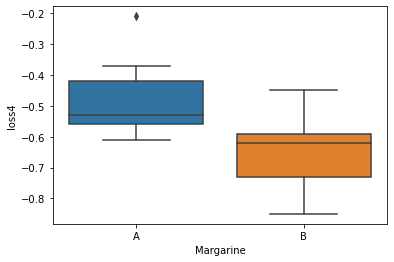

In [4]:
sns.boxplot(df.Margarine,df.loss4)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Margarine', ylabel='loss8'>

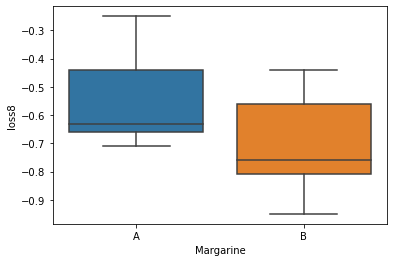

In [5]:
sns.boxplot(df.Margarine,df.loss8)

In [6]:
stats.ttest_ind(df[df['Margarine']== 'A'].loss4,df[df['Margarine'] == 'B'].loss4,equal_var=True)

Ttest_indResult(statistic=2.5185987910477103, pvalue=0.022803946887595898)

In [7]:
formula = 'loss4 ~ C(Margarine)'
model = ols(formula,df).fit()
anova = anova_lm(model)
print(anova)

                df    sum_sq   mean_sq        F    PR(>F)
C(Margarine)   1.0  0.116806  0.116806  6.34334  0.022804
Residual      16.0  0.294622  0.018414      NaN       NaN


In [8]:
formula = 'loss8 ~ C(Margarine)'
model = ols(formula,df).fit()
anova = anova_lm(model)
print(anova)

                df    sum_sq   mean_sq         F    PR(>F)
C(Margarine)   1.0  0.121689  0.121689  4.634786  0.046933
Residual      16.0  0.420089  0.026256       NaN       NaN


In [9]:
df = pd.read_csv('M5_T2_V1_Diet.csv')
df

,gender,Age,Height,preweight,Diet,weight6weeks
0,Female,22,159,58,1,54.2
1,Female,46,192,60,1,54.0
2,Female,55,170,64,1,63.3
3,Female,33,171,64,1,61.1
4,Female,50,170,65,1,62.2
...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2
72,Male,49,177,84,3,79.9
73,Male,28,164,85,3,79.7
74,Male,40,167,87,3,77.8


In [10]:
from bioinfokit.analys import stat

In [11]:
df['wtloss'] = df['preweight'] - df['weight6weeks']
df

,gender,Age,Height,preweight,Diet,weight6weeks,wtloss
0,Female,22,159,58,1,54.2,3.8
1,Female,46,192,60,1,54.0,6.0
2,Female,55,170,64,1,63.3,0.7
3,Female,33,171,64,1,61.1,2.9
4,Female,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2,2.8
72,Male,49,177,84,3,79.9,4.1
73,Male,28,164,85,3,79.7,5.3
74,Male,40,167,87,3,77.8,9.2


C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diet', ylabel='wtloss'>

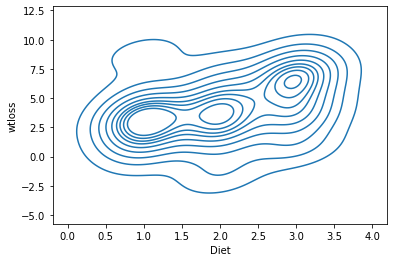

In [12]:
sns.kdeplot(df.Diet,df.wtloss)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='wtloss'>

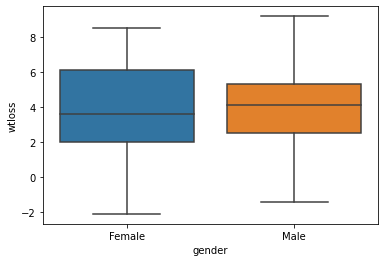

In [13]:
sns.boxplot(df.gender,df.wtloss)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diet', ylabel='wtloss'>

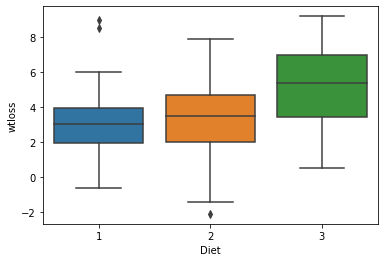

In [14]:
sns.boxplot(df.Diet,df.wtloss)

C:\Users\devro\Ardy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diet', ylabel='wtloss'>

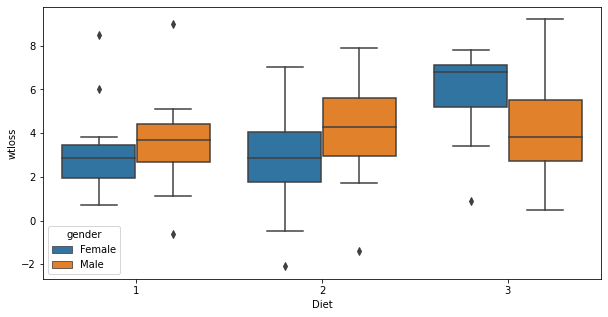

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(df.Diet,df.wtloss,hue=df.gender)

<AxesSubplot:xlabel='Diet', ylabel='wtloss'>

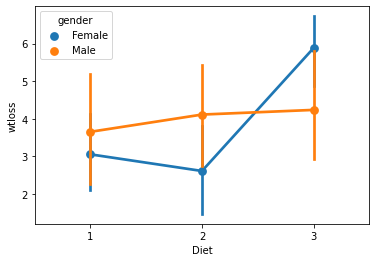

In [16]:
sns.pointplot(x='Diet',y='wtloss',hue='gender',data=df)

<AxesSubplot:xlabel='Diet', ylabel='wtloss'>

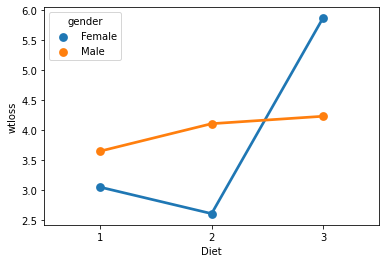

In [17]:
sns.pointplot(x='Diet',y='wtloss',hue='gender',data=df,ci=0)

In [18]:
formula = 'wtloss ~ C(gender)'
model = ols(formula,df).fit()
anova = anova_lm(model)
print(anova)


             df      sum_sq   mean_sq         F    PR(>F)
C(gender)   1.0    0.278485  0.278485  0.043786  0.834827
Residual   74.0  470.650331  6.360140       NaN       NaN


In [19]:
formula = 'wtloss ~ C(Diet)'
model = ols(formula,df).fit()
anova = anova_lm(model)
print(anova)


            df      sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0   60.527008  30.263504  5.383104  0.006596
Residual  73.0  410.401807   5.621943       NaN       NaN


In [20]:
formula = 'wtloss ~ C(Diet) + C(gender)'
model = ols(formula,df).fit()
anova = anova_lm(model)
print(anova)


             df      sum_sq    mean_sq         F    PR(>F)
C(Diet)     2.0   60.527008  30.263504  5.311547  0.007052
C(gender)   1.0    0.168696   0.168696  0.029608  0.863866
Residual   72.0  410.233112   5.697682       NaN       NaN


In [21]:
res = stat()
res.tukey_hsd(df,res_var='wtloss',xfac_var=['Diet','gender'],anova_model='wtloss ~ C(gender)+C(Diet)')

In [22]:
df = pd.DataFrame(res.tukey_summary)

In [23]:
df

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(1, Female)","(1, Male)",0.600000,-2.293523,3.493523,0.858570,0.900000
1,"(1, Female)","(2, Female)",0.442857,-2.198556,3.084270,0.694190,0.900000
2,"(1, Female)","(2, Male)",1.059091,-1.756665,3.874847,1.557362,0.870746
3,"(1, Female)","(3, Female)",2.830000,0.232983,5.427017,4.511936,0.024717
4,"(1, Female)","(3, Male)",1.183333,-1.565937,3.932604,1.782136,0.780674
5,"(1, Male)","(2, Female)",1.042857,-1.850666,3.936380,1.492276,0.896827
6,"(1, Male)","(2, Male)",0.459091,-2.594414,3.512596,0.622517,0.900000
7,"(1, Male)","(3, Female)",2.230000,-0.623052,5.083052,3.236282,0.212300
8,"(1, Male)","(3, Male)",0.583333,-2.408973,3.575640,0.807164,0.900000
9,"(2, Female)","(2, Male)",1.501948,-1.313808,4.317704,2.208570,0.609790


In [24]:
df[df['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
3,"(1, Female)","(3, Female)",2.830000,0.232983,5.427017,4.511936,0.024717
10,"(2, Female)","(3, Female)",3.272857,0.675840,5.869874,5.217994,0.005583


In [26]:
from scipy.stats import chi2_contingency
df = pd.read_csv('M5_T3_V2_TitanicSurvival.csv')
df

,Name,survived,gender,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,1st
1,"Allison, Master. Hudson Trevor",yes,male,1st
2,"Allison, Miss. Helen Loraine",no,female,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,1st
...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,3rd
1305,"Zabour, Miss. Thamine",no,female,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,3rd
1307,"Zakarian, Mr. Ortin",no,male,3rd


In [37]:
a = pd.crosstab(df.gender,df.survived)
a

survived,no,yes
gender,,
female,127,339
male,682,161


In [30]:
pd.crosstab(df.passengerClass,df.survived)

survived,no,yes
passengerClass,,
1st,123,200
2nd,158,119
3rd,528,181


In [35]:
d = pd.pivot_table(data=df,index='gender',columns = ['passengerClass','survived'],aggfunc='count')

In [36]:
d

Name                        
passengerClass  1st       2nd      3rd     
survived         no  yes   no yes   no  yes
gender                                     
female            5  139   12  94  110  106
male            118   61  146  25  418   75

In [38]:
chi2,pval,df,expfreq = chi2_contingency(a)
pval

4.589924936952945e-81

In [39]:
a

survived,no,yes
gender,,
female,127,339
male,682,161


In [40]:
icecream = pd.read_csv('M5_T3_V2_Ice_cream.csv')
icecream

,Gender,Flavor
0,Male,Chocolate
1,Female,Vanilla
2,Male,Strawberry
3,Male,Strawberry
4,Male,Vanilla
...,...,...
195,Female,Vanilla
196,Female,Vanilla
197,Female,Vanilla
198,Female,Vanilla


In [42]:
df = pd.crosstab(index=icecream.Flavor,columns = icecream.Gender)
df

Gender,Female,Male
Flavor,,
Chocolate,32,15
Strawberry,29,29
Vanilla,48,47


In [43]:
chi2_contingency(df)

(4.576532398429519,
 0.10144219001975933,
 2,
 array([[25.615, 21.385],
        [31.61 , 26.39 ],
        [51.775, 43.225]]))

In [44]:
1 - stats.f.cdf(2.54,4,95)

0.04480415309010177

In [45]:
1 - stats.f.cdf(4.5,1,18)

0.04803752774094716

In [46]:
1 - stats.chi2.cdf(10.5,4)

0.032796989994883674